In [63]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
train_path = 'DatasetOfRaces/train'
valid_path = 'DatasetOfRaces/valid'
test_path = 'DatasetOfRaces/test'

In [68]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256, 256), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256, 256), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256, 256), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=40)

Found 399 images belonging to 4 classes.
Found 199 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [69]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [74]:
imgs, labels = next(train_batches)

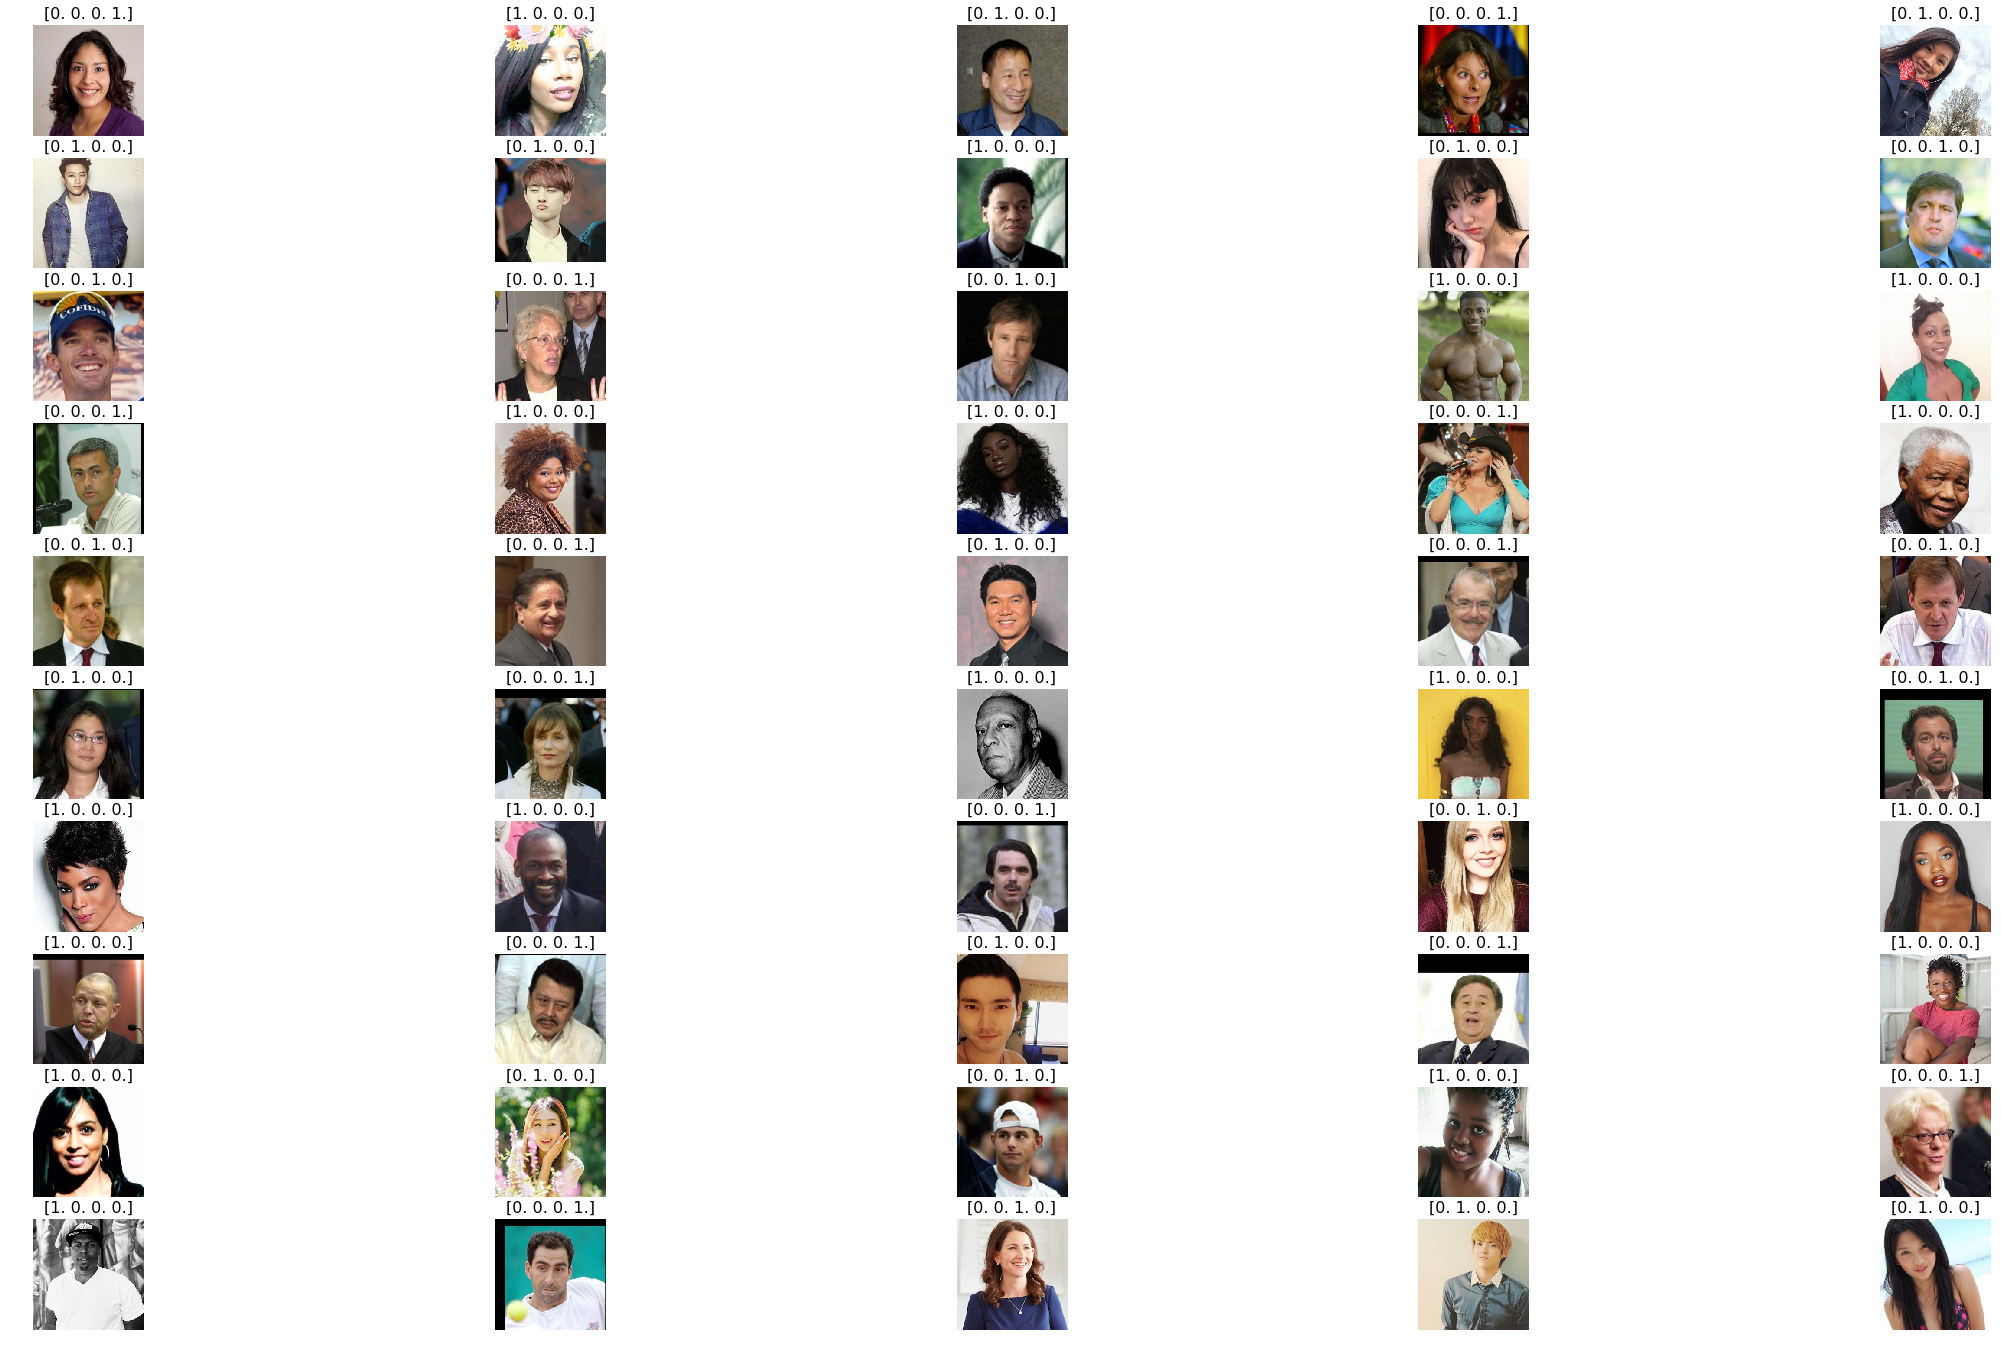

In [75]:
plots(imgs, titles=labels)

In [13]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
        Flatten(),
        Dense(4, activation='softmax'),
    ])

In [14]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=5, verbose=2)

Epoch 1/5
 - 24s - loss: 11.9676 - acc: 0.2530 - val_loss: 12.0683 - val_acc: 0.2513
Epoch 2/5
 - 22s - loss: 12.1212 - acc: 0.2480 - val_loss: 12.0683 - val_acc: 0.2513
Epoch 3/5
 - 22s - loss: 12.1219 - acc: 0.2479 - val_loss: 12.0683 - val_acc: 0.2513
Epoch 4/5
 - 22s - loss: 12.1153 - acc: 0.2483 - val_loss: 12.0683 - val_acc: 0.2513
Epoch 5/5
 - 22s - loss: 12.1212 - acc: 0.2480 - val_loss: 12.0683 - val_acc: 0.2513


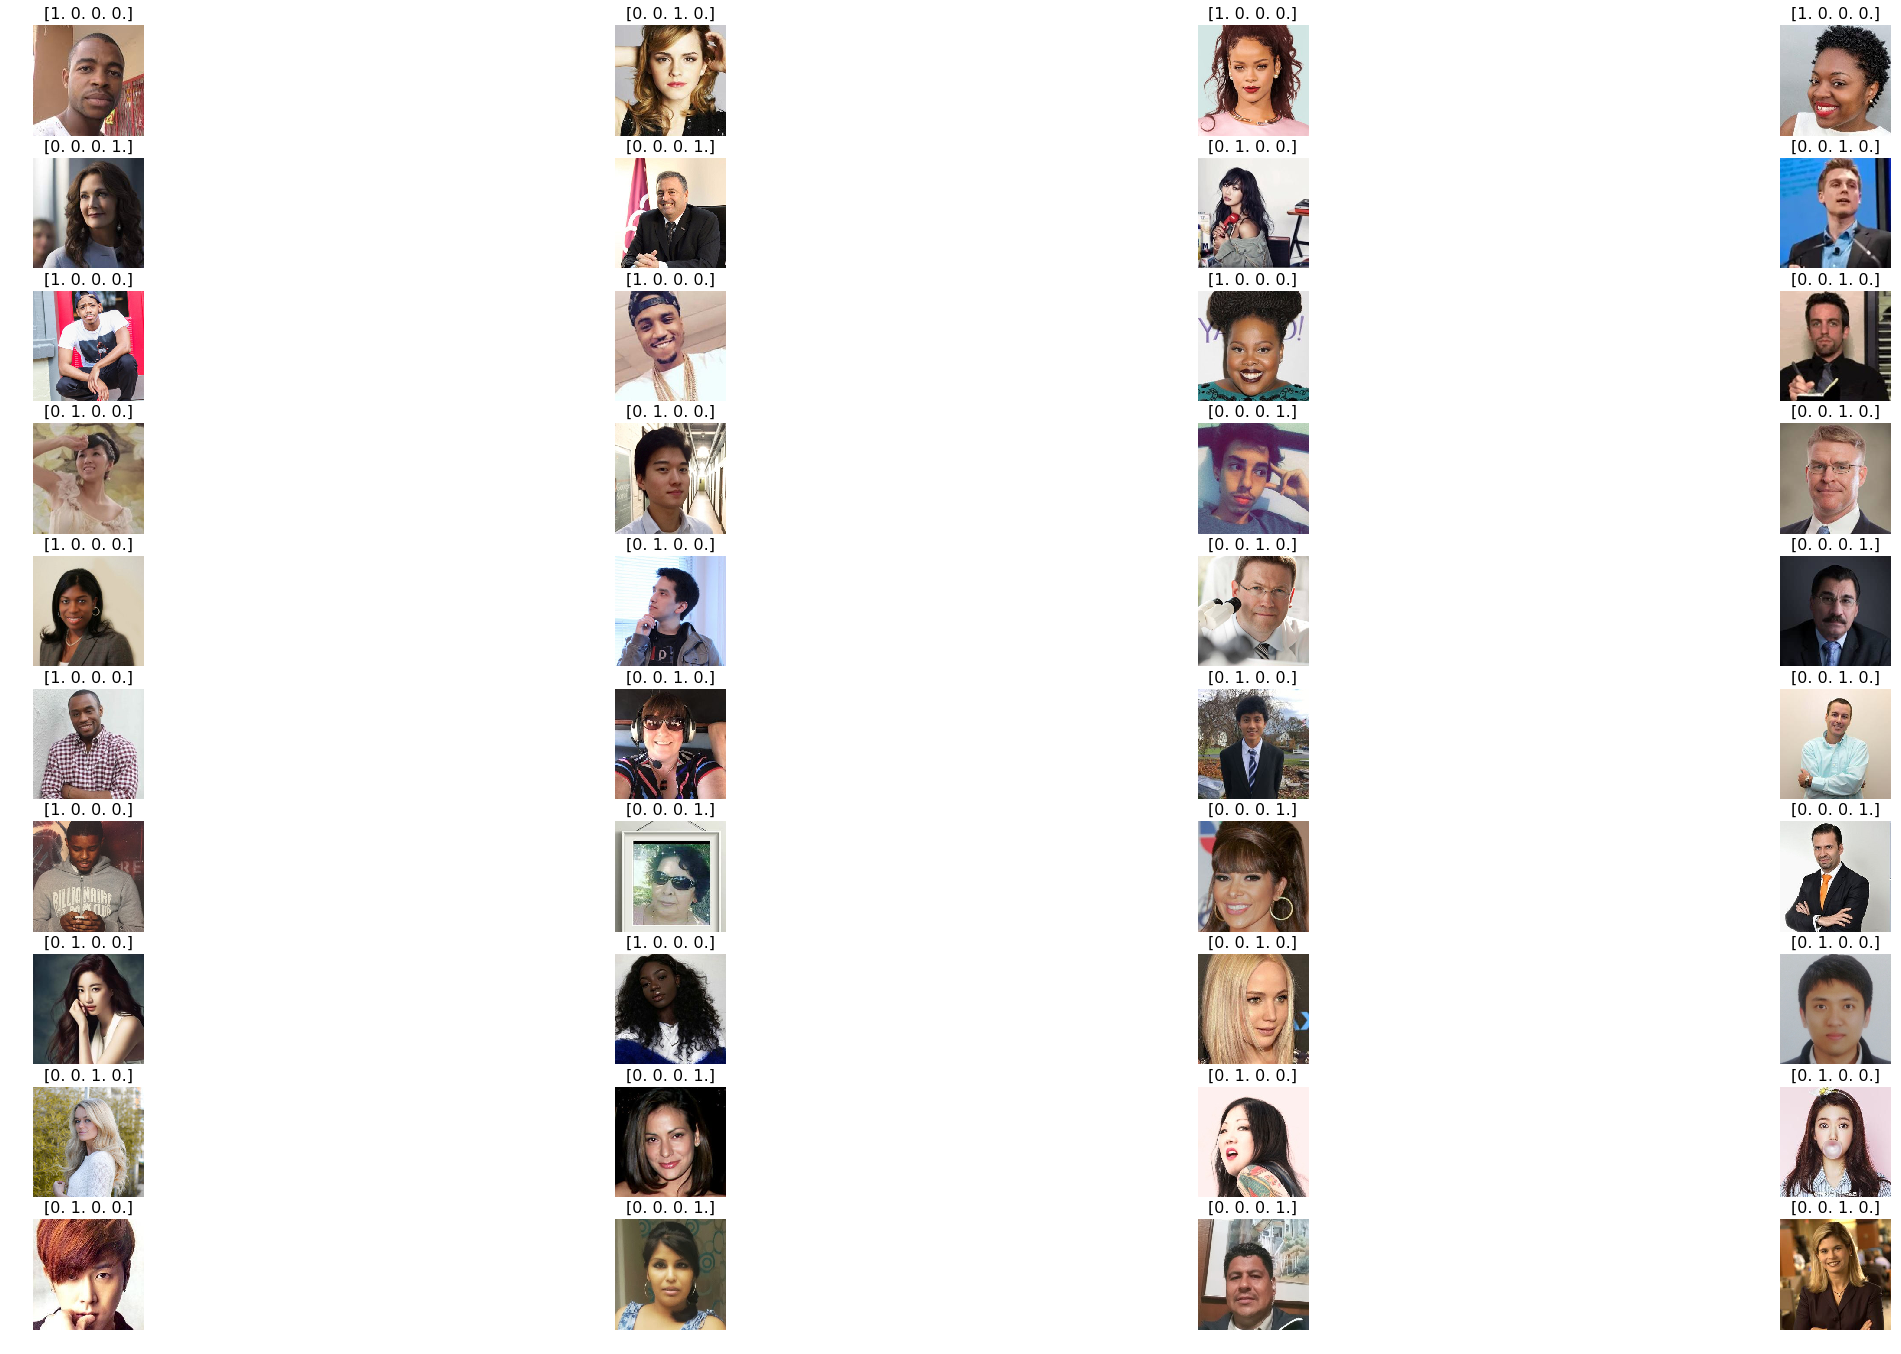

In [16]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [17]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [19]:
predictions

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]],

In [22]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [52]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Confusion matrix, without normalization
[[ 0 30]
 [ 0 10]]


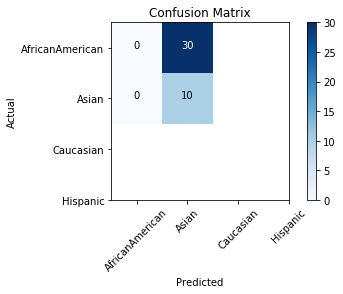

In [53]:
cm_plot_labels = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [45]:
vgg16_model = keras.applications.vgg16.VGG16()

In [9]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
type(vgg16_model)

keras.engine.training.Model

In [11]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
model.layers.pop()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
for layer in model.layers:
    layer.trainable = False

In [16]:
model.add(Dense(4, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=10, verbose=2)

Epoch 1/10
 - 335s - loss: 1.3864 - acc: 0.2633 - val_loss: 1.3851 - val_acc: 0.2814
Epoch 2/10
 - 445s - loss: 1.3805 - acc: 0.3733 - val_loss: 1.3845 - val_acc: 0.3166
Epoch 3/10
 - 331s - loss: 1.3755 - acc: 0.4589 - val_loss: 1.3837 - val_acc: 0.3065
Epoch 4/10


KeyboardInterrupt: 

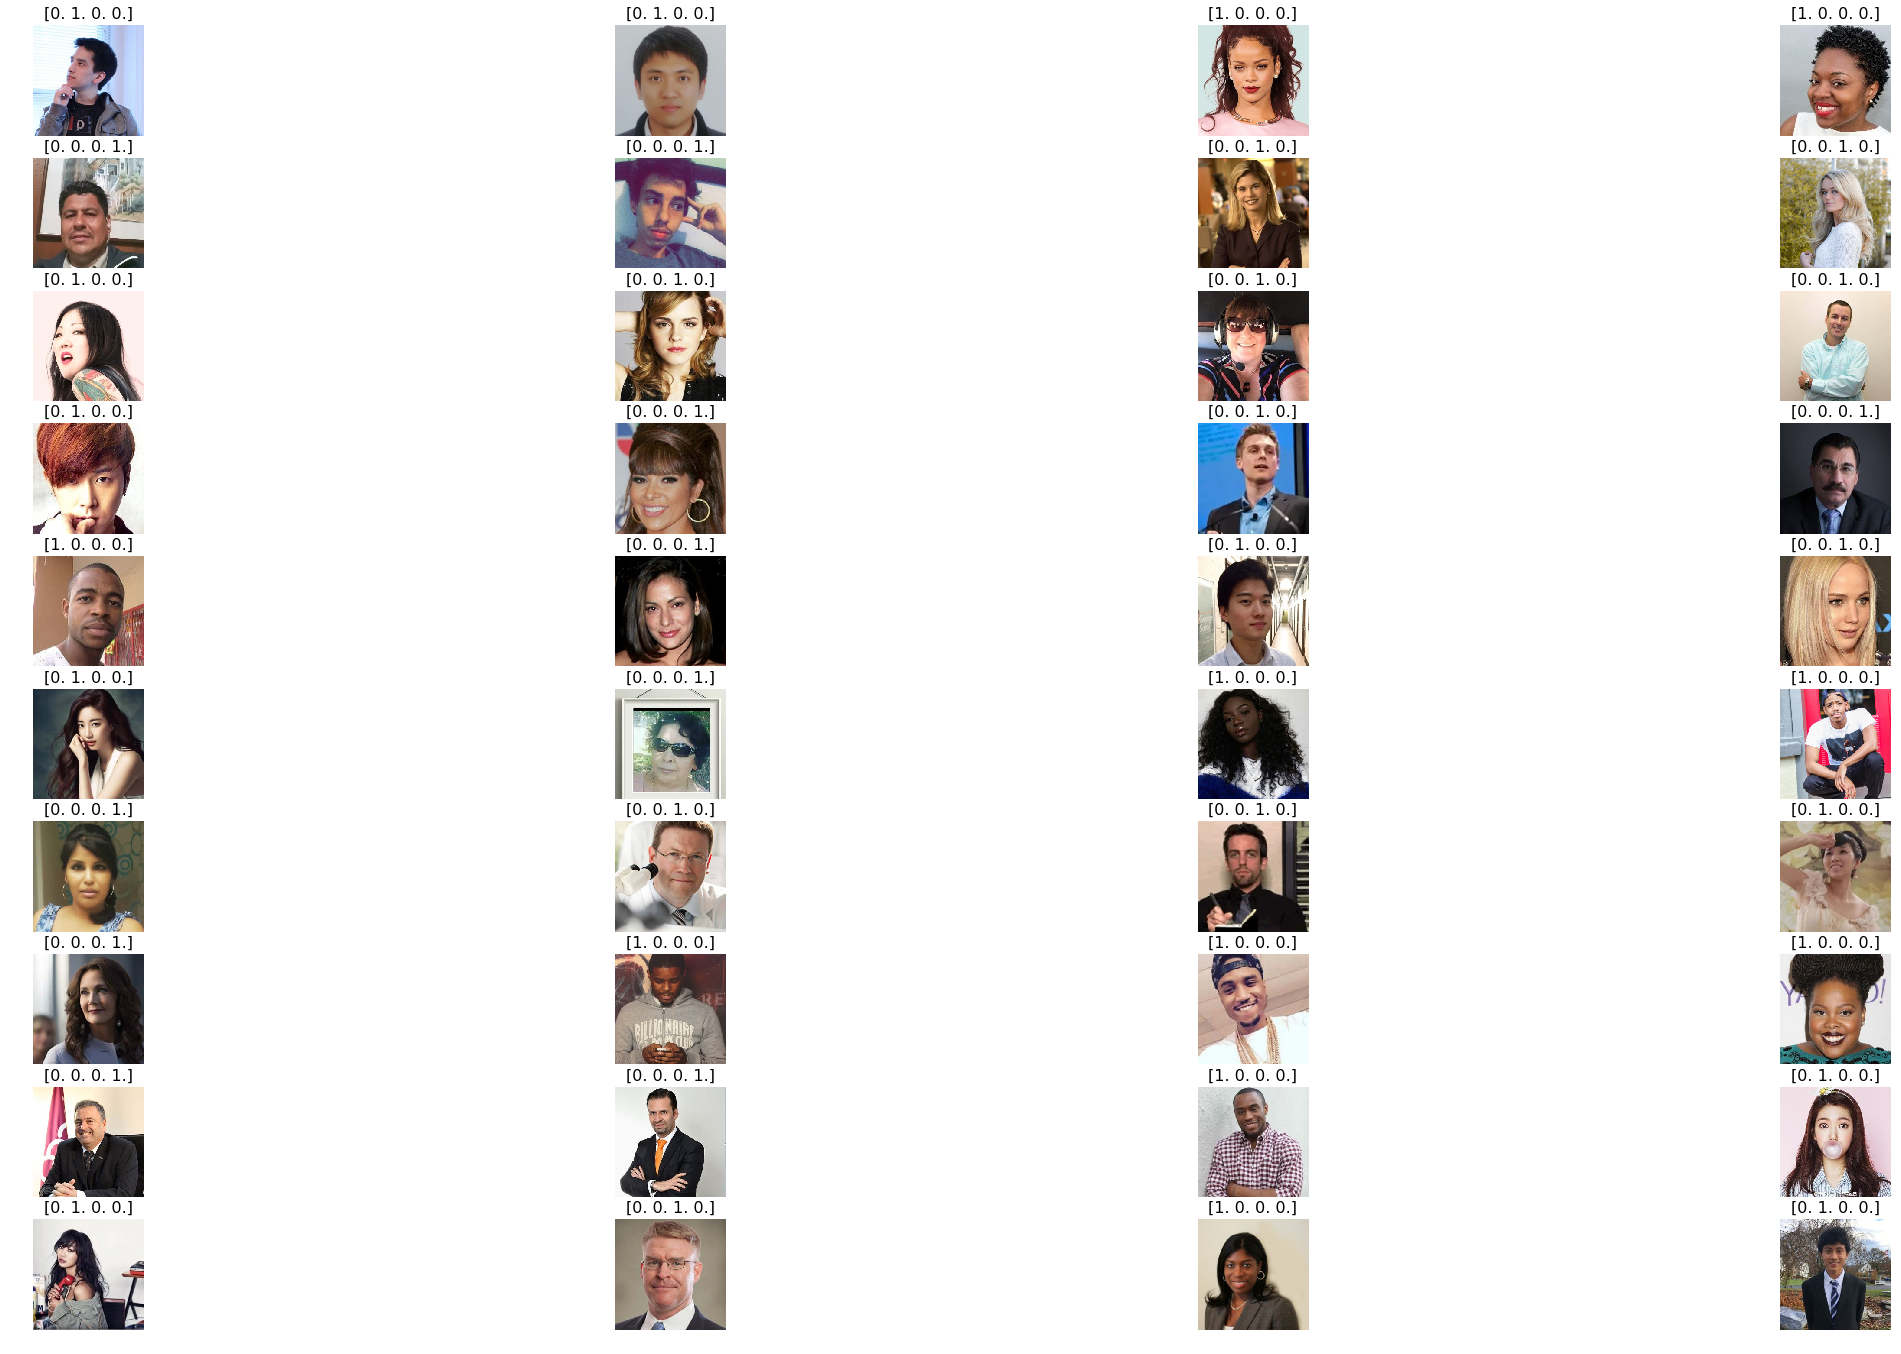

In [54]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [55]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0.], dtype=float32)

In [56]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [57]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[ 0 30]
 [ 0 10]]


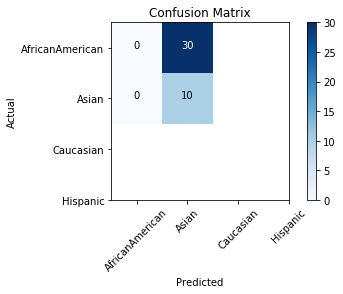

In [58]:
cm_plot_labels = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')